# Load Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


# EDA 

In [3]:
train_df = train_df.dropna()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [5]:
train_df.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,734ab2cf0d,Back on track with the transcription process. ...,good,neutral
freq,1,1,199,11117


<AxesSubplot:xlabel='sentiment', ylabel='count'>

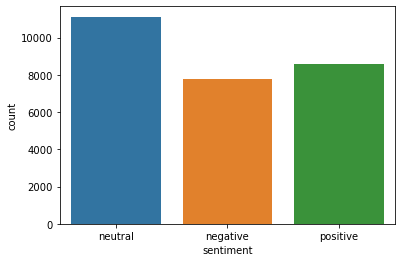

In [6]:
sns.countplot(x = train_df['sentiment'])

In [7]:
train_df['length'] = train_df['text'].apply(len)

<ipython-input-7-32249767375b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['length'] = train_df['text'].apply(len)


In [8]:
train_df

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,122
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,27


<AxesSubplot:ylabel='Frequency'>

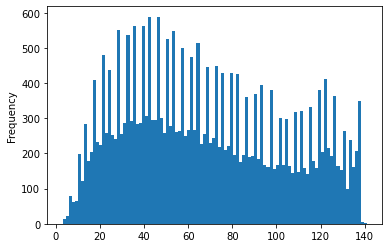

In [9]:
train_df['length'].plot(bins=100, kind='hist')

In [10]:
train_df.describe()

,length
count,27480.000000
mean,68.330022
std,35.603870
min,3.000000
25%,39.000000
50%,64.000000
75%,97.000000
max,141.000000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

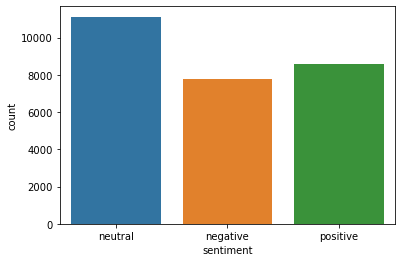

In [11]:
sns.countplot(x = train_df['sentiment'])

# Plot Word Cloud

In [12]:
positive_tweets = train_df[train_df['sentiment'] == 'positive']
positive_tweets

,textID,text,selected_text,sentiment,length
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,64
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,69
11,16fab9f95b,I really really like the song Love Story by Ta...,like,positive,56
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive,135
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive,51
...,...,...,...,...,...
27467,432e6de6c9,morning twit-friends! welcome to my new followers,welcome,positive,49
27474,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive,126
27475,b78ec00df5,enjoy ur night,enjoy,positive,16
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111


In [13]:
negative_tweets = train_df[train_df['sentiment'] == 'negative']
negative_tweets

,textID,text,selected_text,sentiment,length
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative,44
...,...,...,...,...,...
27464,e7eecffdc8,rec game....trying not to cry...the pain is to...,breakingg,negative,108
27470,778184dff1,lol i know and haha..did you fall asleep?? o...,t bored,negative,79
27472,8f5adc47ec,http://twitpic.com/663vr - Wanted to visit the...,were too late,negative,75
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77


In [14]:
neutral_tweets = train_df[train_df['sentiment'] == 'neutral']
neutral_tweets

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,92
7,50e14c0bb8,Soooo high,Soooo high,neutral,10
8,e050245fbd,Both of you,Both of you,neutral,12
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral,107
...,...,...,...,...,...
27468,a753a93e45,"few grilled mushrooms and olives, feta cheese ...","few grilled mushrooms and olives, feta cheese ...",neutral,101
27469,ac92790d8b,94 more days till BH comes back to LA,94 more days till BH comes back to LA,neutral,37
27471,15bb120f57,"i`m defying gravity. and nobody in alll of oz,...","i`m defying gravity. and nobody in alll of oz,...",neutral,106
27473,a208770a32,in spoke to you yesterday and u didnt respond...,in spoke to you yesterday and u didnt respond ...,neutral,67


In [15]:
positive_string = "".join(positive_tweets['text'].tolist())

In [16]:
negative_string = "".join(negative_tweets['text'].tolist()) 

In [17]:
neutral_string = "".join(neutral_tweets['text'].tolist()) 

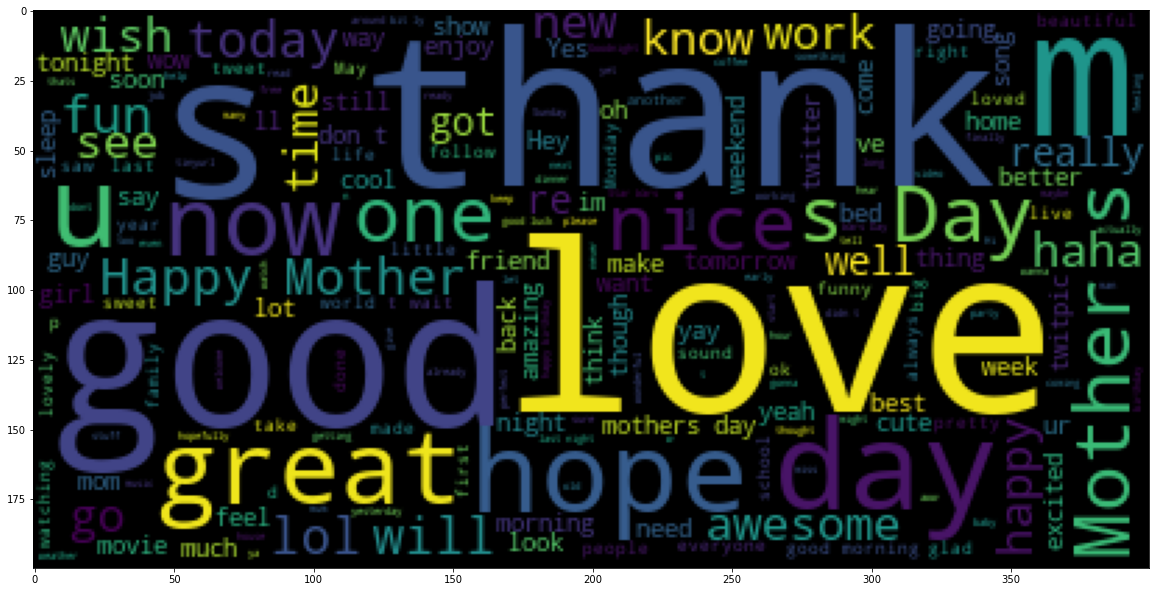

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(positive_string))

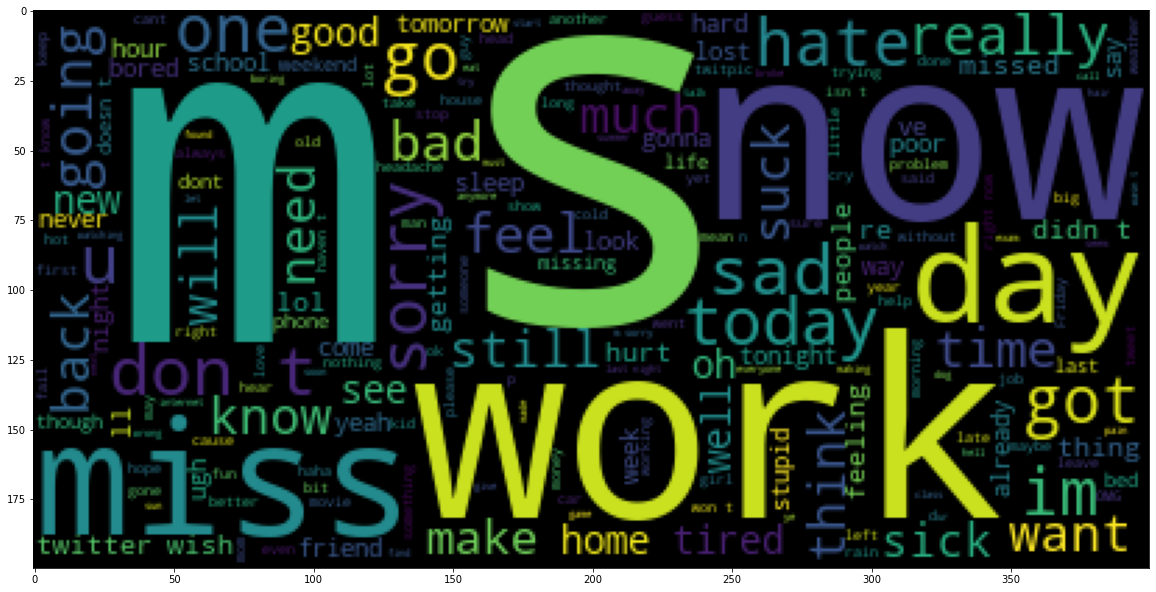

In [19]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(negative_string))

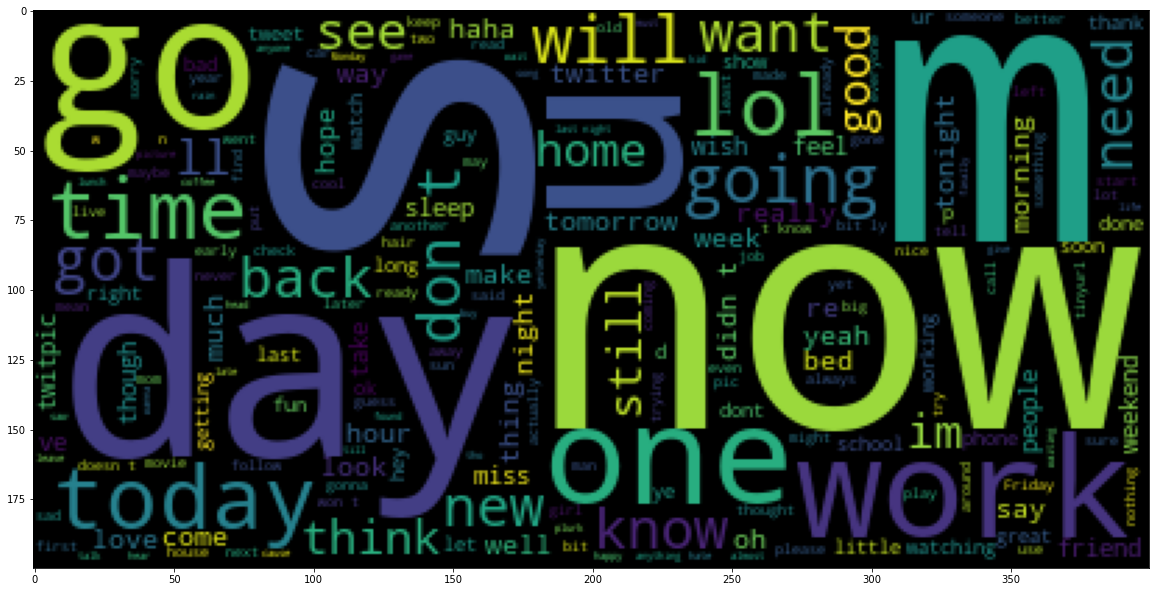

In [20]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(neutral_string))

# Data Cleaning

In [21]:
import string

import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def message_cleaning(message):
    message_punctuation_removed = "".join([char for char in message if char not in string.punctuation])
    message_punctuation_removed_join_clean = [word for word in message_punctuation_removed.split() if word.lower() not in stopwords.words('english')]
    return message_punctuation_removed_join_clean

In [23]:
train_df_clean = train_df['text'].apply(message_cleaning)

In [24]:
print(train_df['text'][5])

http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth


In [25]:
print(train_df_clean[5])

['httpwwwdothebouncycomsmf', 'shameless', 'plugging', 'best', 'Rangers', 'forum', 'earth']


# Tokenization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(train_df['text'])

In [27]:
print(vectorizer.get_feature_names())

['0', '00', '000', '0003', '007', '01', '01Xx', '024', '03', '04', '0405', '0407', '04071991', '0430', '05', '050809', '0530', '0531', '06', '0600', '0630', '07', '079ï¿½', '07i', '08', '080509', '080809', '09', '0981', '0RPM', '0Tronic', '0UT', '0f', '0kenjoy', '0n', '0o', '0robertpatt', '1', '10', '100', '1000', '10000', '100000', '10000000000', '100000000000000000000000000000000000', '10000th', '1000th', '1000x', '1008', '100msgsecond', '100th', '100word', '100x', '101', '1010', '1012', '1015', '1017', '102', '1024', '1027', '1029', '103', '1030', '1030am', '1030lammmeeee', '1030pm', '103Ffevered', '1040', '1045', '105', '1057', '105744', '106', '1073', '108', '10807', '109', '1095', '10K', '10P', '10TY', '10YearOld', '10am', '10days', '10k', '10m', '10mins', '10mm', '10pm', '10th', '10yr', '11', '110', '1100', '1102', '1105', '111', '1110pm', '1111', '1111make', '1115', '1116', '1118', '111am', '1120NOW', '1130', '114', '1140', '1145', '1155hours', '115AM', '117th', '118', '11PM', 

C:\Users\Tong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
tweets_countvectorizer.shape

(27480, 35177)

In [30]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

In [34]:
# work around solution, due to hardware limitation 
X = tweets.iloc[:5000]
X

,0,1,2,3,4,5,6,7,8,9,...,35167,35168,35169,35170,35171,35172,35173,35174,35175,35176
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = train_df['sentiment'].iloc[:5000]
y

0        neutral
1       negative
2       negative
3       negative
4       negative
          ...   
4996    positive
4997    positive
4998     neutral
4999     neutral
5000    positive
Name: sentiment, Length: 5000, dtype: object

# Models

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Naive Bayes Model

In [37]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

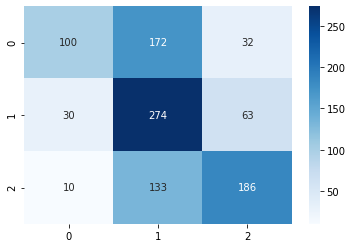

In [39]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [40]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.71      0.33      0.45       304
     neutral       0.47      0.75      0.58       367
    positive       0.66      0.57      0.61       329

    accuracy                           0.56      1000
   macro avg       0.62      0.55      0.55      1000
weighted avg       0.61      0.56      0.55      1000



## Logistic Regression

              precision    recall  f1-score   support

    negative       0.68      0.44      0.54       304
     neutral       0.52      0.73      0.60       367
    positive       0.71      0.62      0.66       329

    accuracy                           0.60      1000
   macro avg       0.64      0.60      0.60      1000
weighted avg       0.63      0.60      0.60      1000



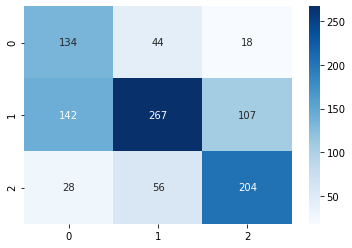

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))

## Gradient Boosting Classifier

              precision    recall  f1-score   support

    negative       0.84      0.35      0.49       304
     neutral       0.50      0.87      0.64       367
    positive       0.79      0.57      0.66       329

    accuracy                           0.61      1000
   macro avg       0.71      0.60      0.60      1000
weighted avg       0.70      0.61      0.60      1000



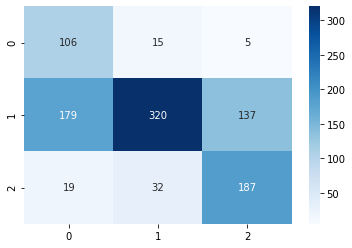

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))